In [10]:
import numpy as np
import pandas as pd

In [11]:
pip install ucimlrepo

In [12]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print('Features : ',individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)



/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Features :  {'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 

In [13]:
print(len(X))

2075259


In [14]:
X[X['Date']=='1/1/2007'] # particular date values

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
21996,1/1/2007,00:00:00,2.580,0.136,241.970,10.600,0.000,0.000,0.0
21997,1/1/2007,00:01:00,2.552,0.100,241.750,10.400,0.000,0.000,0.0
21998,1/1/2007,00:02:00,2.550,0.100,241.640,10.400,0.000,0.000,0.0
21999,1/1/2007,00:03:00,2.550,0.100,241.710,10.400,0.000,0.000,0.0
22000,1/1/2007,00:04:00,2.554,0.100,241.980,10.400,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...
23431,1/1/2007,23:55:00,0.536,0.258,241.770,2.400,0.000,0.000,0.0
23432,1/1/2007,23:56:00,0.498,0.204,241.360,2.200,0.000,0.000,0.0
23433,1/1/2007,23:57:00,0.464,0.152,241.510,2.000,0.000,0.000,0.0
23434,1/1/2007,23:58:00,0.462,0.150,241.010,2.000,0.000,0.000,0.0


In [15]:
'''
Data cleaning :
  - check for null values
  - type should be formatted
  - check for missing flow of time update or remove
  - duplicate time stamps
  - check for inconcictency in time
'''

df  = X
print( 'Total Observations : ',len(df))

# check for null or nan values

(df.isna()==True).count() # no observation has NULL values

# type of the features in data

df.info()

# change the data types
'''
 #   Column                 Dtype
---  ------                 -----
 0   Date                   object  --> date
 1   Time                   object --> time
 2   Global_active_power    object --> float
 3   Global_reactive_power  object --> float
 4   Voltage                object --> float
 5   Global_intensity       object --> float
 6   Sub_metering_1         object --> flaot
 7   Sub_metering_2         object --> flaot
 8   Sub_metering_3         float64 --> no change
'''
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M:%S').dt.time

df.head()

Total Observations :  2075259
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [16]:
import pandas as pd
from pandas.api.types import infer_dtype


for col in df.columns:
    print(f"Column '{col}' inferred dtype: {infer_dtype(df[col])}")

Column 'Date' inferred dtype: datetime64
Column 'Time' inferred dtype: time
Column 'Global_active_power' inferred dtype: mixed
Column 'Global_reactive_power' inferred dtype: mixed
Column 'Voltage' inferred dtype: mixed
Column 'Global_intensity' inferred dtype: mixed
Column 'Sub_metering_1' inferred dtype: mixed
Column 'Sub_metering_2' inferred dtype: mixed
Column 'Sub_metering_3' inferred dtype: floating


In [17]:
# need to handle those mixed types
# lets get understanding of what are accumulated thats stopping converttyeps to fail

# For float type
top5_floats = df[df['Global_active_power'].apply(lambda x: isinstance(x, float))]['Global_active_power']

# For string type
top5_strings = df[df['Global_active_power'].apply(lambda x: isinstance(x, str))]['Global_active_power']


In [18]:
string_values = df[df['Global_active_power'].apply(lambda x: isinstance(x, str))]['Global_active_power'].unique()
print(string_values)
# unique values in strings from Global_active_power

['4.216' '5.360' '5.374' ... '8.404' '8.418' '8.344']


In [19]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [20]:
columns_toConvert = ['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']

for col in columns_toConvert:
    bad_values = {}  # Reset for each column
    for val in df[col].unique():
        try:
            float(val)
        except (ValueError, TypeError):
            if val in bad_values:
                bad_values[val] += 1
            else:
                bad_values[val] = 1
    print(f'Column: {col} - Bad values:', bad_values)


Column: Global_active_power - Bad values: {'?': 1}
Column: Global_reactive_power - Bad values: {'?': 1}
Column: Voltage - Bad values: {'?': 1}
Column: Global_intensity - Bad values: {'?': 1}
Column: Sub_metering_1 - Bad values: {'?': 1}
Column: Sub_metering_2 - Bad values: {'?': 1}
Column: Sub_metering_3 - Bad values: {}


In [21]:
df[columns_toConvert].replace('?',np.nan)
df[columns_toConvert] = df[columns_toConvert].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 142.5+ MB


In [22]:
# check for missing flow of time update or remove
'''
for reindexing:
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='T')
df = df.reindex(full_range)

'''
# how consistent they r, which dates

# Count how many rows per date
missingupdate_df = df.groupby('Date').size()

# Get the dates which are inconsistent (< 1440)
ms = missingupdate_df[missingupdate_df < 1440].reset_index()

# Taking out the inconsistent dates
filtered_df = df[df["Date"].isin(ms['Date'])].reset_index(drop=True)


In [23]:
summary = df.groupby('Date').agg(
    Row_Count=('Time', 'count'),
    Start_Time=('Time', 'min'),
    End_Time=('Time', 'max')
).reset_index()

bad_dates = summary[
    (summary['Row_Count'] < 1440) |
    (summary['Start_Time'] != pd.to_datetime("00:00:00").time()) |
    (summary['End_Time'] != pd.to_datetime("23:59:00").time())
]

print(bad_dates)

           Date  Row_Count Start_Time  End_Time
0    2006-12-16        396   17:24:00  23:59:00
1441 2010-11-26       1263   00:00:00  21:02:00


In [24]:
# handling inconsistecies
# -Option 1: Drop Incomplete Days
# -Option 2: Impute or Pad Missing Time Steps
# -Option 3: Use Variable-Length Sequences with Padding + Masking - in keras

# option -1 dropping incomplete Days

df_cleaned = df[~(df['Date'].isin(bad_dates['Date']))]
df = df_cleaned
df.count()

,0
Date,2073600
Time,2073600
Global_active_power,2047621
Global_reactive_power,2047621
Voltage,2047621
Global_intensity,2047621
Sub_metering_1,2047621
Sub_metering_2,2047621
Sub_metering_3,2047621


In [25]:
print(df.isnull().sum())

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [26]:
# lets drop totally empty rows

# List of feature columns (excluding Date and Time)
feature_cols = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]
#df= df.dropna(subset=feature_cols, how='all')

# fill the short gaps using ffill
# fill long gaps with interpolation

df = df.fillna(method = 'ffill',limit = 2)
df = df.interpolate(method='linear')

print(df.isnull().sum())

# the rows which are of NULL, has all the values of feature_cols null, now out dataset has no null values

/tmp/ipython-input-2975998951.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'ffill',limit = 2)
/tmp/ipython-input-2975998951.py:19: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [27]:
# sort the values by date and time

df = df.sort_values(['Date','Time']).reset_index(drop=True)


In [28]:
df.head()
df.index.tolist()[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
# add column that categorizes the each power consumption entry in to 3 categories (high/medium/low)

low_thr = df['Global_intensity'].quantile(0.33)
high_thr = df['Global_intensity'].quantile(0.66)

def categorize_intensity(x):
    if x < low_thr:
        return 0  # Low
    elif x < high_thr:
        return 1  # Medium
    else:
        return 2  # High

df['intensity_class'] = df['Global_intensity'].apply(categorize_intensity)

In [30]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,intensity_class
count,2073600,2073600.000,2073600.000,2073600.000,2073600.000,2073600.000,2073600.000,2073600.000,2073600.000
mean,2008-12-05 12:00:00,1.090,0.124,240.834,4.620,1.110,1.290,6.440,1.057
min,2006-12-17 00:00:00,0.076,0.000,223.200,0.200,0.000,0.000,0.000,0.000
25%,2007-12-11 18:00:00,0.310,0.048,238.990,1.400,0.000,0.000,0.000,0.000
50%,2008-12-05 12:00:00,0.614,0.100,241.000,2.600,0.000,0.000,1.000,1.000
75%,2009-11-30 06:00:00,1.528,0.194,242.870,6.400,0.000,1.000,17.000,2.000
max,2010-11-25 00:00:00,11.122,1.390,254.150,48.400,88.000,80.000,31.000,2.000
std,NaN,1.052,0.112,3.237,4.423,6.117,5.788,8.415,0.816


In [31]:
'''
1.date: Date in format dd/mm/yyyy
2.time: time in format hh:mm:ss
3.global_active_power: household global minute-averaged active power (in kilowatt)
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5.voltage: minute-averaged voltage (in volt)
6.global_intensity: household global minute-averaged current intensity (in ampere)
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.
'''
# problem - predicting high/low/medium current usage

import torch
from torch import nn,optim


class SimpleRNN(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(SimpleRNN,self).__init__()
    self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size,output_size)

  def forward(self,X):
    x,h = self.rnn(X) # batch_size,seq_length,output
    out = x[:,-1,:]
    fc_out = self.fc(out)
    return fc_out



In [32]:
from sklearn.model_selection import train_test_split

# Select numeric features (excluding date/time)
feature_cols = ['Global_active_power', 'Global_reactive_power',
                'Voltage', 'Global_intensity',
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

X = df[feature_cols].values.astype(np.float32)
y = df['intensity_class'].values.astype(np.int64)  # target classes

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [38]:
def create_sequences(features, targets, seq_len, step=5):
    X_seq, y_seq = [], []
    for i in range(0, len(features) - seq_len, step):
        X_seq.append(features[i:i+seq_len])
        y_seq.append(targets[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 60
step = 10  # jump every 5 timesteps instead of every 1

X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_len, step)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_len, step)


In [39]:
print("Train sequences shape:", X_train_seq.shape)
print("Test sequences shape:", X_test_seq.shape)


Train sequences shape: (165882, 60, 7)
Test sequences shape: (41466, 60, 7)


In [40]:
model = SimpleRNN(7,5,3)

In [41]:
import torch.nn as nn
import torch.optim as optim

# Loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Optimizer - Adam is a good default choice
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [42]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Assume X_train_seq, y_train_seq, X_test_seq, y_test_seq are created with step > 1

batch_size = 64

# Create datasets and loaders
train_dataset = TensorDataset(torch.tensor(X_train_seq, dtype=torch.float32),
                              torch.tensor(y_train_seq, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test_seq, dtype=torch.float32),
                             torch.tensor(y_test_seq, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_0 = model.to(device)  #model instance
optimizer = torch.optim.Adam(model_0.parameters())  # or your choice
loss_fn = torch.nn.CrossEntropyLoss()  # classification task

epochs = 100

for epoch in range(epochs):
    model_0.train()
    train_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        y_pred = model_0(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    model_0.eval()
    test_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            test_pred = model_0(X_batch)
            loss = loss_fn(test_pred, y_batch)
            test_loss += loss.item()

    if epoch % 10 == 0:
        avg_train_loss = train_loss / len(train_loader)
        avg_test_loss = test_loss / len(test_loader)
        print(f"Epoch: {epoch} | Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f}")



Epoch: 0 | Train Loss: 0.7879 | Test Loss: 0.6507
Epoch: 10 | Train Loss: 0.2999 | Test Loss: 0.3443
Epoch: 20 | Train Loss: 0.2609 | Test Loss: 0.2795
Epoch: 30 | Train Loss: 0.2487 | Test Loss: 0.2686
Epoch: 40 | Train Loss: 0.2437 | Test Loss: 0.2650
Epoch: 50 | Train Loss: 0.2368 | Test Loss: 0.2524
Epoch: 60 | Train Loss: 0.2332 | Test Loss: 0.2488
Epoch: 70 | Train Loss: 0.2308 | Test Loss: 0.2461
Epoch: 80 | Train Loss: 0.2288 | Test Loss: 0.2387
Epoch: 90 | Train Loss: 0.2276 | Test Loss: 0.2469


cpu : seq 60 : step 10 batch_size: 64

Epoch: 0 | Train Loss: 0.6122 | Test Loss: 0.3949

Epoch: 10 | Train Loss: 0.2274 | Test Loss: 0.2504

Epoch: 20 | Train Loss: 0.2229 | Test Loss: 0.2345

Epoch: 30 | Train Loss: 0.2202 | Test Loss: 0.2292

Epoch: 40 | Train Loss: 0.2189 | Test Loss: 0.2294

Epoch: 50 | Train Loss: 0.2173 | Test Loss: 0.2294



GPU : seq 60 : step 1 batch_size: 64

Epoch: 0 | Train Loss: 1.0959 | Test Loss: 1.1010

Epoch: 10 | Train Loss: 1.0957 | Test Loss: 1.1007

Epoch: 20 | Train Loss: 1.0957 | Test Loss: 1.1007

Epoch: 30 | Train Loss: 1.0957 | Test Loss: 1.0992

Epoch: 40 | Train Loss: 1.0957 | Test Loss: 1.1015

Epoch: 50 | Train Loss: 1.0957 | Test Loss: 1.0995

resons : the step is only 1- so massive redundency

updates are negligible

the training is loss change from epoch 0 to epoch 50 is just negligible

we might even be near the “plateau” region where the optimizer can’t move much because the updates are so tiny. ( incresing lerning rate might help fo this issue)


the solution changing the step size

Train Loss and Test Loss both steadily decrease from around 0.78 / 0.65 down to ~0.23 / 0.24.

This means your model is learning well, improving its predictions on both training and validation data.

The gap between train and test loss is quite small, which suggests no significant overfitting.

Loss values below 1 are good for cross-entropy, and values close to 0.2 are quite low, indicating confident and mostly correct predictions.

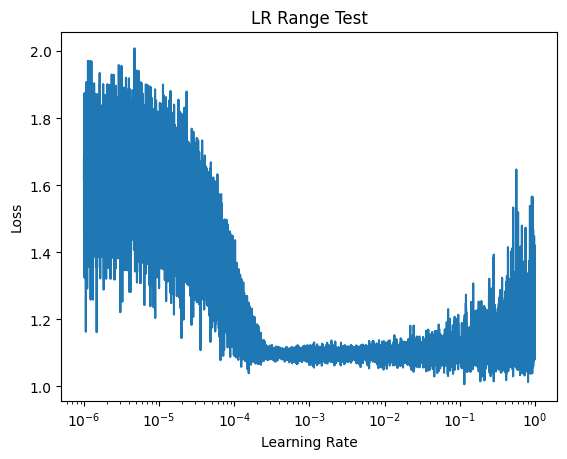

In [37]:
import matplotlib.pyplot as plt

start_lr, end_lr = 1e-6, 1.0
lr = start_lr
optimizer = torch.optim.Adam(model_0.parameters(), lr=lr)  # use optimizer consistently

num_batches = len(train_loader)
mult = (end_lr / start_lr) ** (1.0 / (num_batches - 1))

losses = []
lrs = []

model_0 = model_0.to(device)
model_0.train()

for i, (x, y) in enumerate(train_loader):
    x, y = x.to(device), y.to(device)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    optimizer.zero_grad()
    out = model_0(x)
    loss = loss_fn(out, y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    lrs.append(lr)
    lr *= mult

plt.plot(lrs, losses)
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("LR Range Test")
plt.show()


In [7]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# Define the SimpleRNN model class
class SimpleRNN(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(SimpleRNN,self).__init__()
    self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size,output_size)

  def forward(self,X):
    x,h = self.rnn(X) # batch_size,seq_length,output
    out = x[:,-1,:]
    fc_out = self.fc(out)
    return fc_out


# ==== CONFIG ====
seq_len = 60
batch_size = 64
epochs = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
strides = [1, 9, 30]

# Function to create time-series sequences with stride
def create_sequences(data_X, data_y, seq_len, stride):
    X, y = [], []
    for i in range(0, len(data_X) - seq_len, stride):
        X.append(data_X[i:i+seq_len])
        y.append(data_y[i+seq_len])
    return np.array(X), np.array(y) # Return numpy arrays

# Training loop for multiple epochs
def train_for_epochs(model, optimizer, loss_fn, dataloader, device, epochs):
    model.train()
    losses = []
    for epoch in range(epochs):
        total_loss = 0
        count = 0
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = loss_fn(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            count += 1
        avg_loss = total_loss / count
        losses.append(avg_loss)
        print(f"  Epoch {epoch+1}: Avg Loss = {avg_loss:.4f}")
    return losses

# ==== MAIN TEST LOOP ====
results = {}

# Use the actual X_train and y_train from previous cells
# X_train: shape [N, features]
# y_train: shape [N]


loss_fn = torch.nn.CrossEntropyLoss()

for stride in strides:
    print(f"\nTraining with stride = {stride}")

    # Create sequences with given stride using numpy arrays
    X_seq_np, y_seq_np = create_sequences(X_train, y_train, seq_len, stride)

    # Convert numpy arrays to tensors
    X_seq = torch.tensor(X_seq_np, dtype=torch.float32)
    y_seq = torch.tensor(y_seq_np, dtype=torch.long)

    train_dataset = TensorDataset(X_seq, y_seq)
    dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

    # New model & optimizer for fair comparison
    # Instantiate the model correctly
    model_test = SimpleRNN(input_size=7, hidden_size=5, output_size=3).to(device)
    optimizer_test = torch.optim.Adam(model_test.parameters(), lr=0.001)

    # Train
    avg_losses = train_for_epochs(model_test, optimizer_test, loss_fn, dataloader, device, epochs)
    results[stride] = avg_losses

    # Free GPU memory
    del model_test
    torch.cuda.empty_cache()

# ==== PRINT RESULTS ====
print("\nFinal Results:")
for stride, losses in results.items():
    print(f"Stride {stride}: Avg Train Loss per epoch = {[f'{l:.4f}' for l in losses]}")


Training with stride = 1
  Epoch 1: Avg Loss = 1.1021
  Epoch 2: Avg Loss = 1.0997
  Epoch 3: Avg Loss = 1.0990
  Epoch 4: Avg Loss = 1.0987

Training with stride = 9
  Epoch 1: Avg Loss = 1.1023
  Epoch 2: Avg Loss = 1.1004
  Epoch 3: Avg Loss = 1.0992
  Epoch 4: Avg Loss = 1.0982

Training with stride = 30
  Epoch 1: Avg Loss = 1.1068
  Epoch 2: Avg Loss = 1.1054
  Epoch 3: Avg Loss = 1.1041
  Epoch 4: Avg Loss = 1.1030

Final Results:
Stride 1: Avg Train Loss per epoch = ['1.1021', '1.0997', '1.0990', '1.0987']
Stride 9: Avg Train Loss per epoch = ['1.1023', '1.1004', '1.0992', '1.0982']
Stride 30: Avg Train Loss per epoch = ['1.1068', '1.1054', '1.1041', '1.1030']


Stride 1 is most consistent but slightly slower at first (because of redundancy in overlapping samples).

Stride 9 actually caught up faster at LR=0.001 — suggests a sweet spot in temporal spacing where the model still gets diversity without too much redundancy.

Stride 30 is always the slowest, meaning you’re losing too much sequential info.




Final Results:
Stride 1: Avg Train Loss per epoch = ['1.1008', '1.0988', '1.0983', '1.0975']
Stride 9: Avg Train Loss per epoch = ['1.1334', '1.0988', '1.0943', '1.0908']
Stride 30: Avg Train Loss per epoch = ['1.1030', '1.0929', '1.0864', '1.0808']

lr 0.01

Training with stride = 1
  Epoch 1: Avg Loss = 1.1021
  Epoch 2: Avg Loss = 1.0997
  Epoch 3: Avg Loss = 1.0990
  Epoch 4: Avg Loss = 1.0987

Training with stride = 9
  Epoch 1: Avg Loss = 1.1023
  Epoch 2: Avg Loss = 1.1004
  Epoch 3: Avg Loss = 1.0992
  Epoch 4: Avg Loss = 1.0982

Training with stride = 30
  Epoch 1: Avg Loss = 1.1068
  Epoch 2: Avg Loss = 1.1054
  Epoch 3: Avg Loss = 1.1041
  Epoch 4: Avg Loss = 1.1030

Final Results:
Stride 1: Avg Train Loss per epoch = ['1.1021', '1.0997', '1.0990', '1.0987']
Stride 9: Avg Train Loss per epoch = ['1.1023', '1.1004', '1.0992', '1.0982']
Stride 30: Avg Train Loss per epoch = ['1.1068', '1.1054', '1.1041', '1.1030']

lr = 0.001

In [43]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        outputs = model(x)
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 93.73%
